## Speeds and setup
Let's discuss about the different setups of DSEF applied in real images.

The three modes, or speeds, are described in the table below:

| **Parameter**              | **Low**    | **Medium**   | **High**     |
|---------------------------|----------------|----------------|----------------|
| $\Delta s$ *(EdgeSearch step)*    | dist⁄80        | dist⁄60        | dist⁄40        |
| $\Delta \ell$  *(EdgeFollow step)*    | diag⁄200       | diag⁄100       | diag⁄50        |
| $\Delta \theta$  *(Angle Res.)*         | $\Omega$⁄90           | 4 $\Omega$⁄90          | 10 $\Omega$⁄90         |
| $N_{\theta}$  *(LUT size)*           | 360⁄$\Delta \theta$         | 360⁄$\Delta \theta$         | 360⁄$\Delta \theta$         |

Where $\mathrm{dist} = \sqrt{(u_{\mathrm{end}}-u_{\mathrm{start}})^2 + 
(v_{\mathrm{end}}-v_{\mathrm{start}})^2}$ and $\mathrm{diag} = \sqrt{(\mathrm{Width})^2 + (\mathrm{Height})^2}$

Let's start by importing the libraries and loading the image

**Imports**

In [1]:
import sys
import os
import time
import cv2
import matplotlib.pyplot as plt


module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import dsef

**Load Image**

Image dimensions: (259, 408, 3)


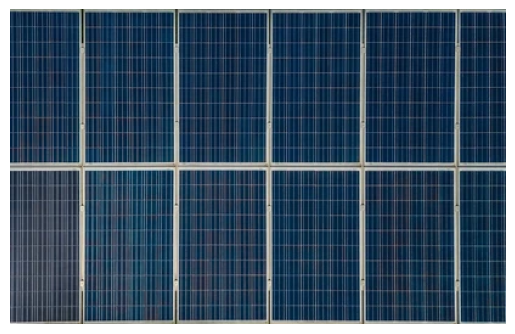

In [2]:
image_path = 'imgs/solar_panel.png'
if not os.path.isfile(image_path):
    raise FileNotFoundError(f"Image '{image_path}' not found.")
    
img = cv2.imread(image_path)

print(f"Image dimensions: {img.shape}")
# Convert the image from BGR (OpenCV default) to RGB (matplotlib default)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Plot the image using matplotlib
plt.imshow(img_rgb)
plt.axis('off')  # Hide the axes
plt.show()

**Initial arguments setup**

In [3]:
initial_direction_deg = 270     # The initial direction in degrees
dir_span = 90                   # The span of directions for search

start_pix = (0+50, 0+50)      # Starting pixel (x, y)
end_pix = (408, 259)          # Ending pixel (x, y), I'll put the last pixel in this image
debug = True

### Different Speed Mode
Let's run the algorithm for different speed modes, in the faster ones the error is higher

In [4]:
speed = "high"
dsef_high = dsef.Dsef(initial_direction_deg, dir_span, start_pix, end_pix, speed, debug)

speed = "medium"
dsef_medium = dsef.Dsef(initial_direction_deg, dir_span, start_pix, end_pix, speed, debug)

speed = "low"
dsef_low = dsef.Dsef(initial_direction_deg, dir_span, start_pix, end_pix, speed, debug)

Now let's perform the Edge Search, for trying to fing the horizontal line, for each speed and record the time

[DEBUG] Overriding d_theta to: 10.0
[DEBUG] Distance between start and end: 414.5419158541148
[DEBUG] Search step: 5.181773948176435
[DEBUG] Follower step: 9.66529875378925
[DEBUG] Edge found. Breaking EdgeSearch.
High Speed: Edge found - True | Time: 39.6548 ms
[DEBUG] Overriding d_theta to: 4.0
[DEBUG] Distance between start and end: 414.5419158541148
[DEBUG] Search step: 6.9090319309019135
[DEBUG] Follower step: 4.832649376894625
[DEBUG] Edge found. Breaking EdgeSearch.
Medium Speed: Edge found: True | Time: 31.5744 ms
[DEBUG] Overriding d_theta to: 1.0
[DEBUG] Distance between start and end: 414.5419158541148
[DEBUG] Search step: 10.36354789635287
[DEBUG] Follower step: 2.4163246884473124
[DEBUG] Edge found. Breaking EdgeSearch.
Low Speed: Edge found: True | Time: 37.1051 ms


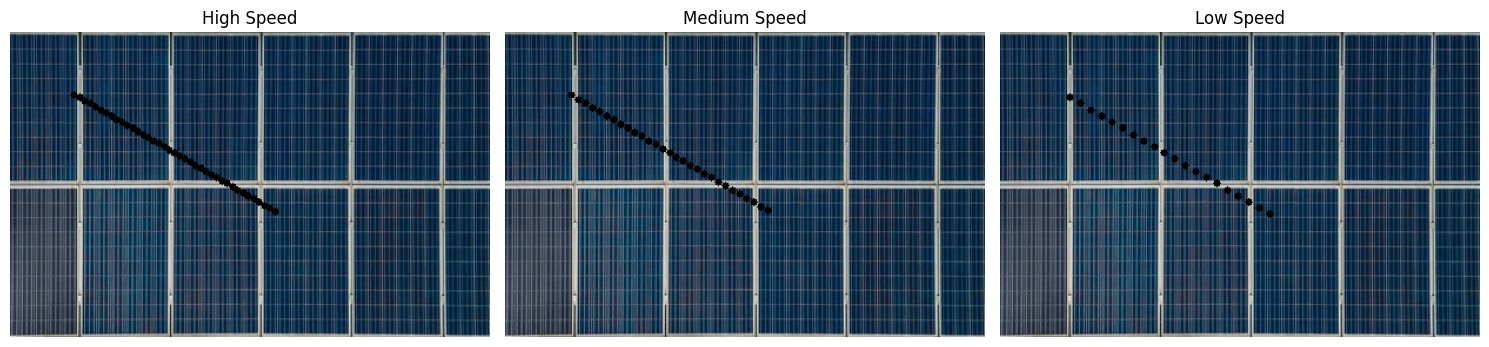

In [5]:
## Perform edge search
start_edge_high = time.time_ns()
edge_found_high, img_high = dsef_high.edge_search(img)
end_edge_high = time.time_ns()
if edge_found_high:
    print(f"High Speed: Edge found - {edge_found_high} | Time: {(end_edge_high - start_edge_high)/1e6} ms")

start_edge_medium = time.time_ns()
edge_found_medium, img_medium = dsef_medium.edge_search(img)
end_edge_medium = time.time_ns()
if edge_found_medium:
    print(f"Medium Speed: Edge found: {edge_found_medium} | Time: {(end_edge_medium - start_edge_medium)/1e6} ms")

start_edge_low = time.time_ns()
edge_found_low, img_low = dsef_low.edge_search(img)
end_edge_low = time.time_ns()
if edge_found_low:
    print(f"Low Speed: Edge found: {edge_found_low} | Time: {(end_edge_low - start_edge_low)/1e6} ms")

# Convert all images to RGB
img_high_rgb = cv2.cvtColor(img_high, cv2.COLOR_BGR2RGB)
img_medium_rgb = cv2.cvtColor(img_medium, cv2.COLOR_BGR2RGB)
img_low_rgb = cv2.cvtColor(img_low, cv2.COLOR_BGR2RGB)

# Plot images side by side
plt.figure(figsize=(15, 5))  # Wider figure to fit images

titles = ['High Speed', 'Medium Speed', 'Low Speed']
images = [img_high_rgb, img_medium_rgb, img_low_rgb]

for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

Now let's do the same for the Edge Follow

[DEBUG] Distance between start and end: 414.5419158541148
[DEBUG] Search step: 5.181773948176435
[DEBUG] Follower step: 9.66529875378925
[DEBUG] EdgeFollow message: we reached END of image
Found edge line [(x1,y1),(x2,y2)]: [(192, 139), (-7483.299451338581, 139.00000000000048)]| Time: 295.7663 ms
[DEBUG] Distance between start and end: 414.5419158541148
[DEBUG] Search step: 6.9090319309019135
[DEBUG] Follower step: 4.832649376894625
[DEBUG] EdgeFollow message: ABORTING. Edge direction +/- 2.0 deg
Found edge line [(x1,y1),(x2,y2)]: [(200, 141), (-4445.442329844854, 303.2224207877201)]| Time: 342.3953 ms
[DEBUG] Distance between start and end: 414.5419158541148
[DEBUG] Search step: 10.36354789635287
[DEBUG] Follower step: 2.4163246884473124
[DEBUG] EdgeFollow message: ABORTING. Edge direction +/- 1.0 deg
Found edge line [(x1,y1),(x2,y2)]: [(200, 139), (-2195.2347377037295, 139.0408960181621)]| Time: 962.8892 ms


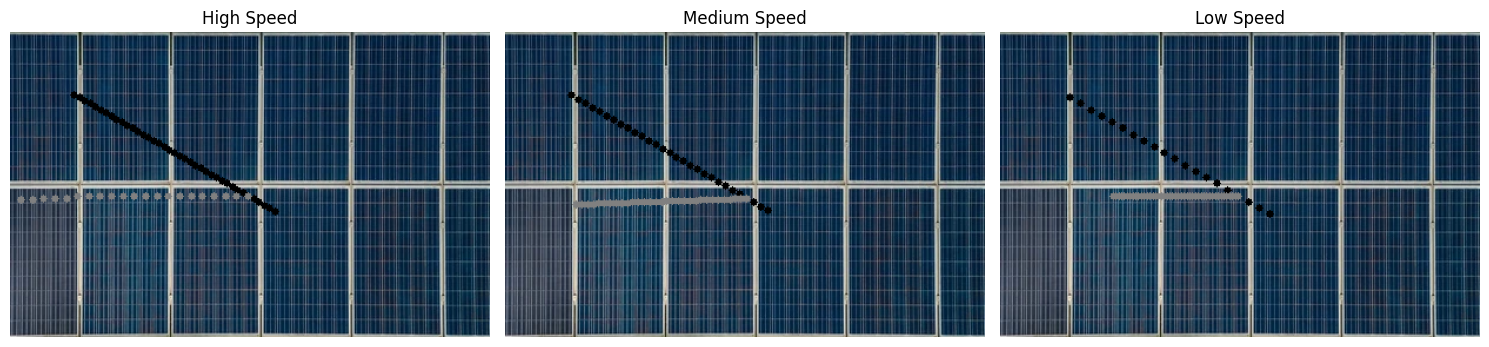

In [6]:
found_edge_line_high = None
if edge_found_high:
    # if the search found an edge, follow it
    start_follow_high = time.time_ns()
    found_edge_line_high, image_high = dsef_high.edge_follow()
    end_follow_high = time.time_ns()
    print(f"Found edge line [(x1,y1),(x2,y2)]: {found_edge_line_high}| Time: {(end_follow_high - start_follow_high)/1e6} ms")

found_edge_line_medium = None
if edge_found_medium:
    # if the search found an edge, follow it
    start_follow_medium = time.time_ns()
    found_edge_line_medium, image_medium = dsef_medium.edge_follow()
    end_follow_medium = time.time_ns()
    print(f"Found edge line [(x1,y1),(x2,y2)]: {found_edge_line_medium}| Time: {(end_follow_medium - start_follow_medium)/1e6} ms")

found_edge_line_low = None
if edge_found_low:
    # if the search found an edge, follow it
    start_follow_low = time.time_ns()
    found_edge_line_low, image_low = dsef_low.edge_follow()
    end_follow_low = time.time_ns()
    print(f"Found edge line [(x1,y1),(x2,y2)]: {found_edge_line_low}| Time: {(end_follow_low - start_follow_low)/1e6} ms")

# Convert all images to RGB
image_high_rgb = cv2.cvtColor(image_high, cv2.COLOR_BGR2RGB)
image_medium_rgb = cv2.cvtColor(image_medium, cv2.COLOR_BGR2RGB)
image_low_rgb = cv2.cvtColor(image_low, cv2.COLOR_BGR2RGB)

# Plot images side by side
plt.figure(figsize=(15, 5))  # Wider figure to fit images

titles = ['High Speed', 'Medium Speed', 'Low Speed']
images = [image_high_rgb, image_medium_rgb, image_low_rgb]

for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

The time results can be seen in the table below

In [7]:
import pandas as pd
import numpy as np

line_y = 129 # the center line is in pixel 129
data = np.array([
    ["Low", "Medium", "High"],
    [(end_edge_low-start_edge_low)/1e6, (end_edge_medium-start_edge_medium)/1e6, (end_edge_high-start_edge_high)/1e6], # EdgeSearch time (ms)
    [(end_follow_low-start_follow_low)/1e6, (end_follow_medium-start_follow_medium)/1e6, (end_follow_high-start_follow_high)/1e6], # EdgeFollow time (ms)
    [found_edge_line_low, found_edge_line_medium, found_edge_line_high], # Line found coordinates [(x1,y1), (x2,y2)]
    [(found_edge_line_low[1][1]+found_edge_line_low[0][1])/2-line_y, 
     (found_edge_line_medium[1][1]+found_edge_line_medium[0][1])/2-line_y, 
     (found_edge_line_high[1][1]+found_edge_line_high[0][1])/2-line_y] # Average line error in y direction (pixels)
],dtype=object)
df = pd.DataFrame(data.T, columns=["Speed", "EdgeSearch time (ms)", "EdgeFollow time (ms)", "Line found coordinates [(x1,y1), (x2,y2)]", 
                                   "Average line error in y direction (pixels)"])

print(df.to_string(index=False))

 Speed EdgeSearch time (ms) EdgeFollow time (ms)              Line found coordinates [(x1,y1), (x2,y2)] Average line error in y direction (pixels)
   Low              37.1051             962.8892 [(200, 139), (-2195.2347377037295, 139.0408960181621)]                                  10.020448
Medium              31.5744             342.3953  [(200, 141), (-4445.442329844854, 303.2224207877201)]                                   93.11121
  High              39.6548             295.7663 [(192, 139), (-7483.299451338581, 139.00000000000048)]                                       10.0
